In [1]:
# use %matplotlib inline in the first cell of the notebook

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]

In [2]:
# load data from the IMDB dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
# Prepare the data (Have to turn lists into tensors.)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
# Build the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
# Compile the network
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Validation

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 218us/step - loss: 0.5087 - acc: 0.7807 - val_loss: 0.3794 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.3006 - acc: 0.9055 - val_loss: 0.3003 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.1750 - acc: 0.9436 - val_loss: 0.2838 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1148 - acc: 0.9654 - val_loss: 0.3146 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.0978 - acc: 0.9706 - val_loss: 0.3130 - val_ac

In [8]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 106us/step


[0.76433645914077764, 0.85043999999999997]

In [9]:
# Note that the call to model.fit() returns a History object. This object has a member history, 
# which is a dictionary containing data about everything that happened during training. 
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])

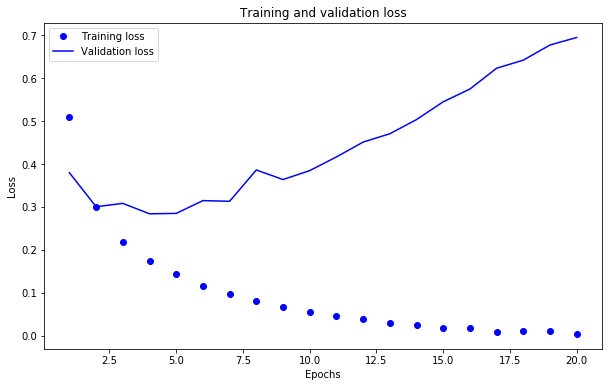

In [10]:


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

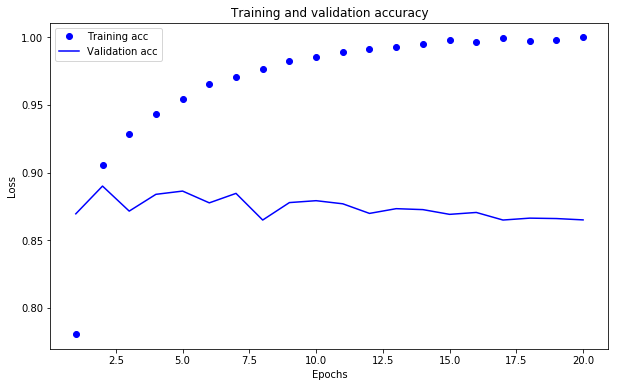

In [11]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Re-train a new network from scratch for four epochs

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 53us/step - loss: 0.4728 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 1s 43us/step - loss: 0.2666 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 47us/step - loss: 0.2031 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 2s 92us/step


In [13]:
results

[0.31151636823654177, 0.87644]

Notes:
We get higher accuracy (87.6% vs 85.0%) when we do early stopping (hard-coded stop at 4 epochs) to avoid overfitting.
Not bad for a naive approach.

## Further Experiments

In [14]:
# Helper functions for plotting loss & accuracy


def plotLoss(history):
    plt.clf()   # clear figure
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    print(val_acc)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print(val_loss)
    
    epochs = range(1, len(acc) + 1)
    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def plotAcc(history):
    plt.clf()   # clear figure
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()    

### Vary the number of layers
Try using 1 or 3 hidden layers. How does it affect validation and test accuracy?

#### 1 layer

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.5048 - acc: 0.7993 - val_loss: 0.3995 - val_acc: 0.8665
Epoch 2/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.3262 - acc: 0.9017 - val_loss: 0.3317 - val_acc: 0.8783
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.2527 - acc: 0.9243 - val_loss: 0.2938 - val_acc: 0.8880
Epoch 4/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.2071 - acc: 0.9378 - val_loss: 0.2792 - val_acc: 0.8910
Epoch 5/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1750 - acc: 0.9464 - val_loss: 0.2752 - val_acc: 0.8901
Epoch 6/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1503 - acc: 0.9556 - val_loss: 0.2759 - val_acc: 0.8898
Epoch 7/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1321 - acc: 0.9621 - val_loss: 0.2816 - val_acc

[0.49946386550188066, 0.85784000000000005]

[0.86649999971389768, 0.87829999990463259, 0.88800000019073488, 0.89100000019073489, 0.89010000019073487, 0.88980000000000004, 0.8881, 0.88360000019073481, 0.88499999990463252, 0.8819000000953674, 0.88280000000000003, 0.88090000028610227, 0.88079999990463254, 0.88039999990463258, 0.87739999990463258, 0.87690000000000001, 0.87479999961853028, 0.87179999952316289, 0.87109999980926511, 0.87229999971389771]
[0.39949989581108092, 0.33170674366950986, 0.29383327569961548, 0.27920316085815428, 0.2752360789299011, 0.27591870603561403, 0.28158093428611758, 0.29745608501434329, 0.29760235266685486, 0.30586565942764282, 0.32214000954627992, 0.33084560642242433, 0.34370110692977907, 0.35761028604507444, 0.37326785278320312, 0.39154311943054199, 0.42272718963623046, 0.44982301936149599, 0.44396994323730471, 0.46226039037704469]


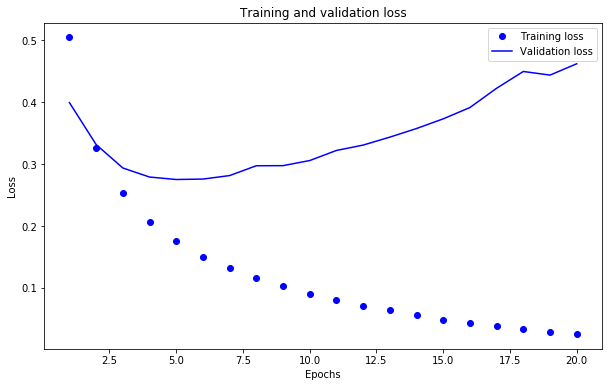

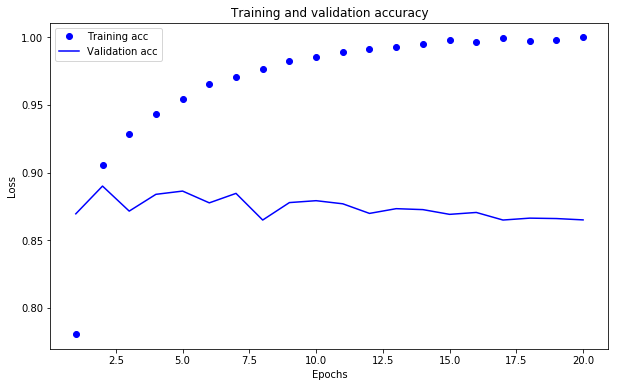

In [16]:
plotLoss(history)
plotAcc(history)

#### 3 layers

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.5262 - acc: 0.7759 - val_loss: 0.3939 - val_acc: 0.8586
Epoch 2/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.3046 - acc: 0.9002 - val_loss: 0.3099 - val_acc: 0.8823
Epoch 3/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2095 - acc: 0.9329 - val_loss: 0.2748 - val_acc: 0.8910
Epoch 4/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1642 - acc: 0.9463 - val_loss: 0.3250 - val_acc: 0.8704
Epoch 5/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.1327 - acc: 0.9585 - val_loss: 0.3210 - val_acc: 0.8770
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1077 - acc: 0.9648 - val_loss: 0.3075 - val_acc: 0.8853
Epoch 7/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.0854 - acc: 0.9748 - val_loss: 0.3291 - val_acc

[0.83094460074663157, 0.85260000000000002]

[0.85859999971389767, 0.88229999999999997, 0.89100000057220463, 0.87040000009536744, 0.87700000009536738, 0.88530000038146972, 0.8829000000953674, 0.88219999999999998, 0.8762999998092651, 0.87860000009536743, 0.87679999971389766, 0.87209999961853024, 0.86439999952316282, 0.87189999961853026, 0.8705999996185303, 0.87070000076293941, 0.87009999942779537, 0.86739999933242795, 0.86709999923706049, 0.86739999923706057]
[0.39385319695472715, 0.30986838726997373, 0.27482767553329468, 0.32504737095832825, 0.32102943458557132, 0.30751453623771668, 0.32909079952239989, 0.35949856290817261, 0.40872239446640013, 0.42300286612510679, 0.45265501403808595, 0.50124970936775204, 0.58685372667312619, 0.56442065715789791, 0.58699049711227413, 0.6194880080223083, 0.65003224124908443, 0.68568529443740844, 0.70863691291809083, 0.75284257822036749]


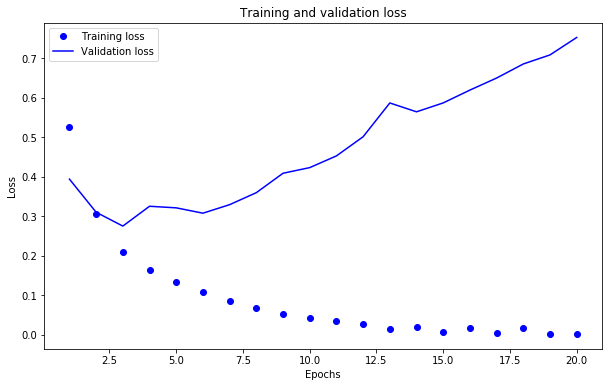

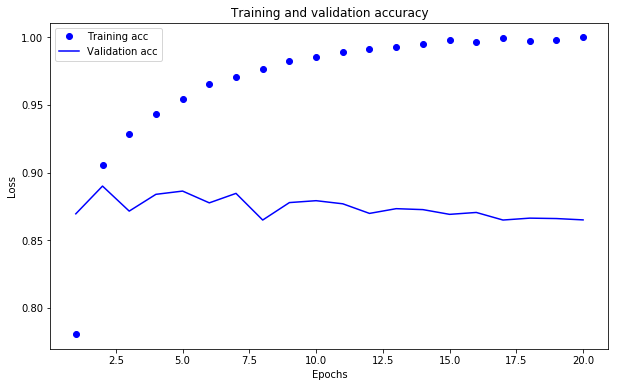

In [18]:
plotLoss(history)
plotAcc(history)

#### Findings
How does 1 or 3 layers affect validation and accuracy?
Compared to baseline:

    1 layer:  increase accuracy (best)
    3 layers: increase accuracy
    